# MNIST

* Data Format: (number of examples, number of features)


### Model: 
* Input ---> 256 ---> 256 ---> 10

* 50,000 examples for training
* 10,000 examples for validation 
* 10,000 examples for testing 

* X_train (50000, 28, 28)  ==> (50000, 784)
* Y_train (50000,)    ==> (50000, 10)

* X_val (10000, 28,28)  --> (10000, 784)
* Y_val (10000,)    ----> (10000, 10)

* X_test (10000, 28,28) ===> (10000, 784)
* Y_test (10000,) -------> (10000, 10)


### Results:
* Accuracy: %97


In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

import sys
import preprocessed_mnist

import tensorflow as tf
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
import keras_utils
from keras_utils import reset_tf_session

print("We're using TF", tf.__version__)
print("We are using Keras", keras.__version__)

get_ipython().magic('matplotlib inline')

C:\Users\abido\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We're using TF 1.8.0
We are using Keras 2.2.0


### Load and View the data

In [2]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocessed_mnist.load_dataset()

X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


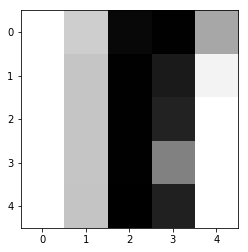

In [3]:
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()

X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


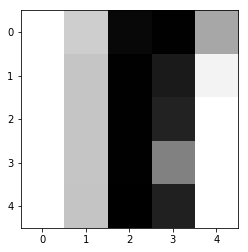

In [6]:
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()

In [12]:
X_train.shape

(50000, 28, 28)

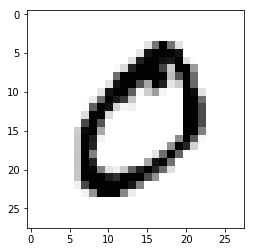

In [11]:
plt.imshow(X_train[1], cmap="Greys")

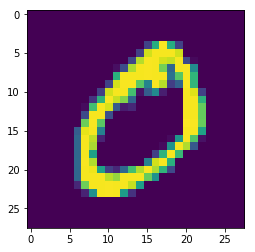

In [13]:
plt.imshow(X_train[1])

### Preprocessing

In [14]:
# flatten images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [15]:
# one-hot encode the target
y_train_oh = keras.utils.to_categorical(Y_train, 10)
y_val_oh = keras.utils.to_categorical(Y_val, 10)
print(y_train_oh.shape)
print(y_val_oh.shape)

(50000, 10)
(10000, 10)


### Model

In [16]:
tf.reset_default_graph()
model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(256, input_shape=(784,)))  # the first layer must specify the input shape (replacing placeholders)
model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)

In [18]:
model.fit(
    X_train_flat, 
    y_train_oh,
    batch_size=512, 
    epochs=40,
    validation_data=(X_val_flat, y_val_oh),
    callbacks=[keras_utils.TqdmProgressCallback()],
    verbose=0
)


Epoch 1/40




Epoch 2/40




Epoch 3/40




Epoch 4/40




Epoch 5/40




Epoch 6/40




Epoch 7/40




Epoch 8/40




Epoch 9/40




Epoch 10/40




Epoch 11/40




Epoch 12/40




Epoch 13/40




Epoch 14/40




Epoch 15/40




Epoch 16/40




Epoch 17/40




Epoch 18/40




Epoch 19/40




Epoch 20/40




Epoch 21/40




Epoch 22/40




Epoch 23/40




Epoch 24/40




Epoch 25/40




Epoch 26/40




Epoch 27/40




Epoch 28/40




Epoch 29/40




Epoch 30/40




Epoch 31/40




Epoch 32/40




Epoch 33/40




Epoch 34/40




Epoch 35/40




Epoch 36/40




Epoch 37/40




Epoch 38/40




Epoch 39/40




Epoch 40/40


### Results

In [19]:
X_test = X_test.reshape((X_test.shape[0], -1))
Y_test = keras.utils.to_categorical(Y_test, 10)

[loss, accuracy] =  model.evaluate(X_test, Y_test)

10000/10000 [==============================] - ETA: 41 - ETA: 2 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 56us/step


In [20]:
print("Loss on test set is {}".format(loss))
print("Accuracy on test set is % {:2f}".format(accuracy * 100))

Loss on test set is 0.0725794899390894
Accuracy on test set is % 97.940000
